<a href="https://colab.research.google.com/github/moncybabu/sharing_github/blob/main/fraud_decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [ ]:
# import some data to play with
fraud = pd.read_csv('/content/Fraud_check.csv')

In [ ]:
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [ ]:
fraud.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [ ]:
df=fraud.rename(columns={'Marital.Status':'Marital','Taxable.Income':'Tax','City.Population':'population','Work.Experience':'experience'}, inplace = False)

In [ ]:
df

,Undergrad,Marital,Tax,population,experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [ ]:
df['risk'] = df.Tax.map(lambda x: 1 if x>=30000 else 0)

In [ ]:
df

,Undergrad,Marital,Tax,population,experience,Urban,risk
0,NO,Single,68833,50047,10,YES,1
1,YES,Divorced,33700,134075,18,YES,1
2,NO,Married,36925,160205,30,YES,1
3,YES,Single,50190,193264,15,YES,1
4,NO,Married,81002,27533,28,NO,1
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,1
596,YES,Divorced,69967,55369,2,YES,1
597,NO,Divorced,47334,154058,0,YES,1
598,YES,Married,98592,180083,17,NO,1


In [ ]:
df['Undergrad']=df['Undergrad'].astype('category')
df['Marital']=df['Marital'].astype('category')
df['Urban']=df['Urban'].astype('category')

In [ ]:
df['Undergrad']=df['Undergrad'].cat.codes
df['Marital']=df['Marital'].cat.codes
df['Urban']=df['Urban'].cat.codes
df.tail()

,Undergrad,Marital,Tax,population,experience,Urban,risk
595,1,0,76340,39492,7,1,1
596,1,0,69967,55369,2,1,1
597,0,0,47334,154058,0,1,1
598,1,1,98592,180083,17,0,1
599,0,0,96519,158137,16,0,1


In [ ]:
df1=df.drop(['Tax'], axis = 1)
  

In [ ]:
df1

,Undergrad,Marital,population,experience,Urban,risk
0,0,2,50047,10,1,1
1,1,0,134075,18,1,1
2,0,1,160205,30,1,1
3,1,2,193264,15,1,1
4,0,1,27533,28,0,1
...,...,...,...,...,...,...
595,1,0,39492,7,1,1
596,1,0,55369,2,1,1
597,0,0,154058,0,1,1
598,1,1,180083,17,0,1


In [ ]:
x=df1.iloc[:,0:4]
y=df1['risk']

In [ ]:
# Splitting data into training and testing data set
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.2,random_state=0)

Decision tree clssifier-entropy

In [ ]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

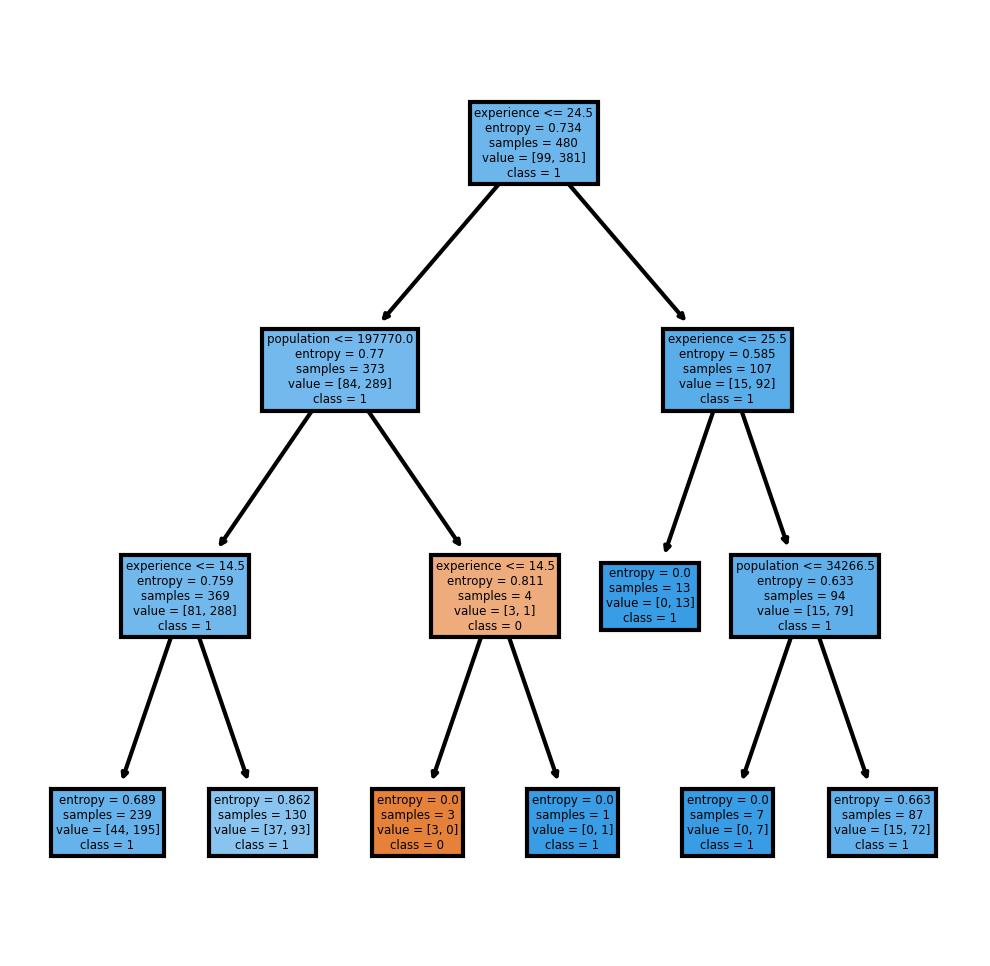

In [ ]:
fn=['Undergrad','Marital','population','experience','Urban']
risk=['0','1']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=risk,
               filled = True);

In [ ]:
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts()

1    119
0      1
dtype: int64

In [ ]:
np.mean(preds==y_test)

0.7833333333333333

Decision Tree Classifier-gini

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [ ]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
preds=model_gini.predict(x_test)
np.mean(preds==y_test)

0.7833333333333333

 Decision Tree Regressor


In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
model1 = DecisionTreeRegressor()
model1.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
model1.score(x_test,y_test)

-1.5263157894736845

Adaboost classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics

In [ ]:
abd = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)

In [ ]:
model3 = abd.fit(x_train, y_train)

In [ ]:
y_pred = model3.predict(x_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.775


Bagging classifier

In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
?BaggingClassifier

In [ ]:
abe = BaggingClassifier(base_estimator=cart, n_estimators=10, max_samples=1.0, max_features=1.0,)

In [ ]:
model4 = abe.fit(x_train, y_train)

In [ ]:
y_pred = model4.predict(x_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.675


Bagging classifier-KFOLD

In [ ]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.svm import SVC
seed = 7

kfold = KFold(n_splits=10, random_state=seed)
cart = DecisionTreeClassifier()
num_trees = 100
ab = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
model1 = ab.fit(x_train, y_train)
y_pred = model1.predict(x_test)
result = cross_val_score(model, x, y, cv=kfold)
print(result.mean())

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.7883333333333333


Adaboost-KFOLD

In [ ]:
num_trees = 10
seed=7
kfold = KFold(n_splits=10, random_state=seed)
abc = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
model2 = abc.fit(x_train, y_train)
y_pred = model2.predict(x_test)
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean())

0.7849999999999999


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
